# Example of the aitlas toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the aitlas toolbox.

## Import the required packages

In [2]:
from aitlas.datasets import PotsdamDataset
from aitlas.utils import image_loader
from aitlas.transforms import MinMaxNormTranspose
from aitlas.models import DeepLabV3

## Visualize images and masks

Total number of patches: 2790


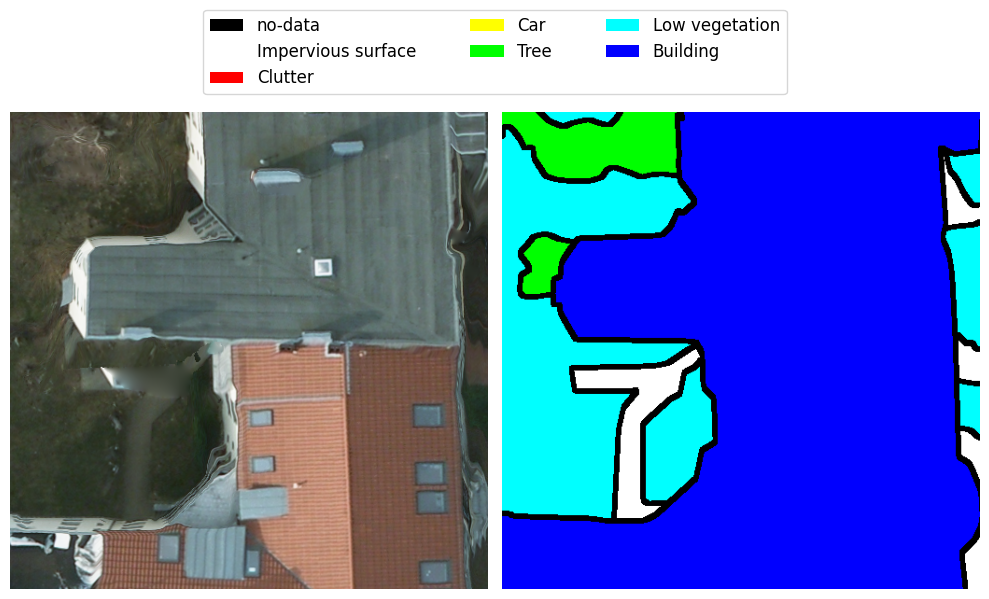

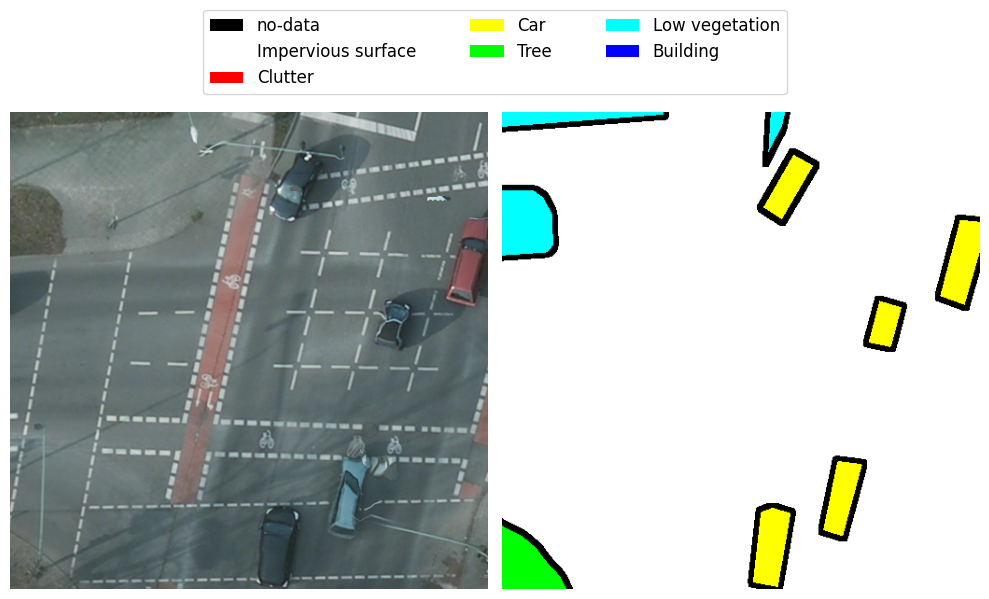

In [3]:
dataset_config = {
    "data_dir": "/home/dragik/data/semseg/Potsdam/data/train"
}
dataset = PotsdamDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(11);
dataset.show_image(26);

In [6]:
dataset.data_distribution_table()

,Number of pixels
no-data,77815152.0
Impervious surface,183710416.0
Clutter,33624532.0
Car,8519021.0
Tree,96386448.0
Low vegetation,151213680.0
Building,180112576.0


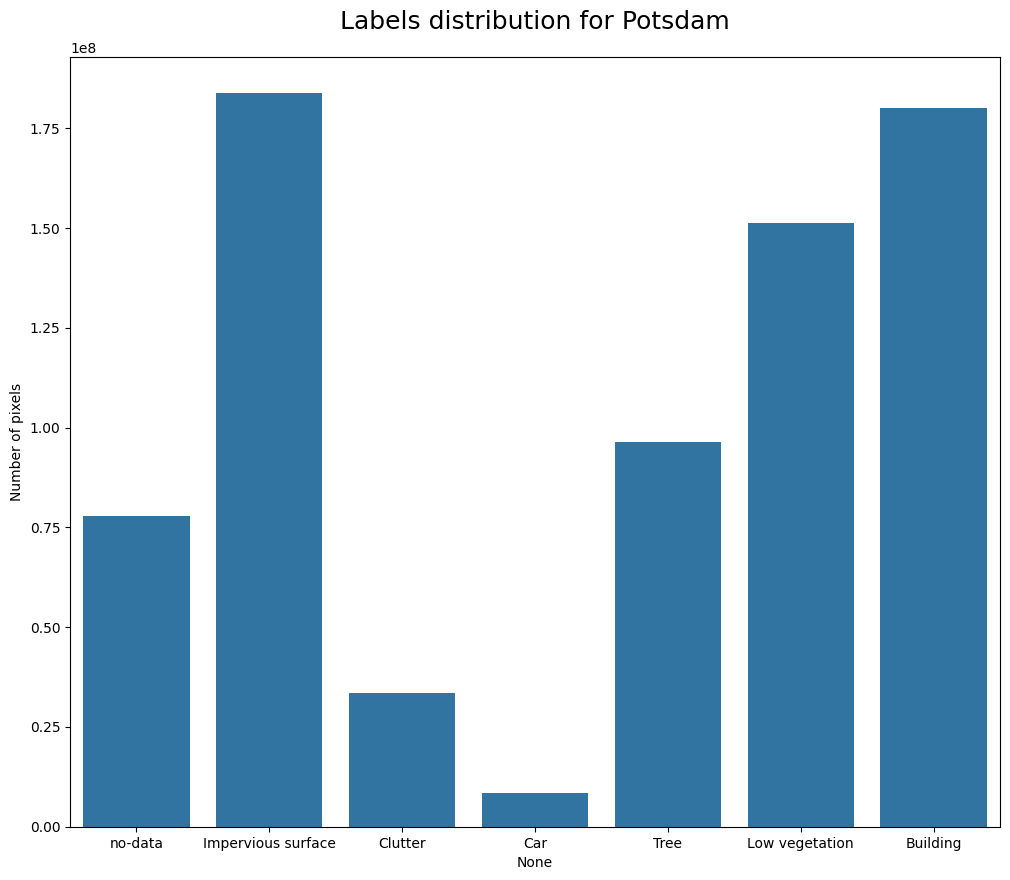

In [7]:
dataset.data_distribution_barchart();

## Load training data ##

In [2]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/Potsdam/data/train",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
train_dataset = PotsdamDataset(train_dataset_config)
len(train_dataset)

2790

## Create the model ##

In [3]:
epochs = 5
model_directory = "/home/dragik/data/semseg/Potsdam/experiments"
model_config = {
    "num_classes": 7, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training ##

In [4]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

2024-04-16 11:19:17,837 INFO Starting training.
2024-04-16 11:19:18.095226: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 11:19:18.662327: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
training: 100%|███████████████████████████████████████████████████████████████████████| 698/698 [02:10<00:00,  5.36it/s]
2024-04-16 11:21:29,283 INFO epoch: 1, time: 130, loss:  0.46675
testing on train set: 100%|███████████████████████████████████████████████████████████| 698/698 [00:40<00:00, 17.07it/s]
2024-04-16 11:22:11,328 INFO IOU:0.6221186082832637, IOU mean:0.4858289385170737, IOU per Class:[0.         0.72216095 0.         0.5776262  0.66764248 0.65643023
 0.7769427 ]
training: 100%|██████████████████

## Evaluate the model ##

In [6]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/Potsdam/data/val",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}

test_dataset = PotsdamDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/home/dragik/data/semseg/Potsdam/experiments/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2024-04-16 11:34:23,639 INFO Loading checkpoint /home/dragik/data/semseg/Potsdam/experiments/checkpoint.pth.tar
2024-04-16 11:34:24,150 INFO Loaded checkpoint /home/dragik/data/semseg/Potsdam/experiments/checkpoint.pth.tar at epoch 6
testing on test set: 100%|████████████████████████████████████████████████████████████| 167/167 [00:09<00:00, 17.22it/s]


[{'IOU': 0.6687094839298048,
  'IOU mean': 0.5925572498985715,
  'IOU per Class': array([0.        , 0.77203443, 0.44361683, 0.7157463 , 0.68536327,
         0.69348502, 0.8376549 ])}]

## Predictions ##

2024-04-16 11:34:38,409 INFO Loading checkpoint /home/dragik/data/semseg/Potsdam/experiments/checkpoint.pth.tar
2024-04-16 11:34:38,855 INFO Loaded checkpoint /home/dragik/data/semseg/Potsdam/experiments/checkpoint.pth.tar at epoch 6


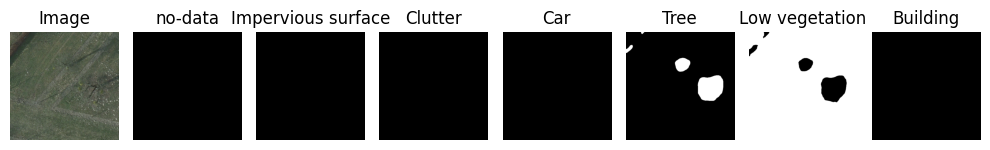

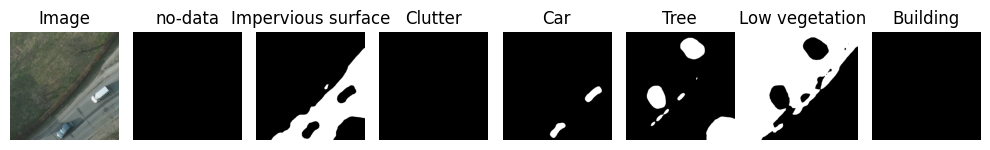

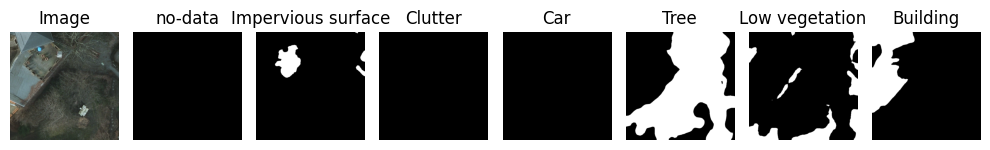

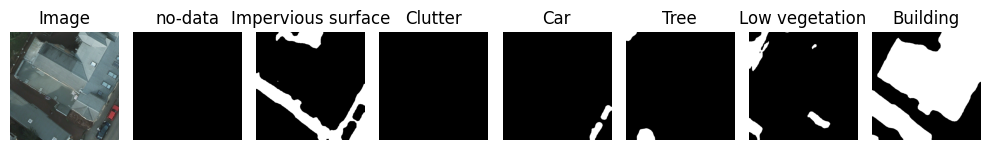

In [7]:
model_path = "/home/dragik/data/semseg/Potsdam/experiments/checkpoint.pth.tar"
labels = ["no-data","Impervious surface","Clutter","Car","Tree","Low vegetation","Building"]
transform = MinMaxNormTranspose()
model.load_model(model_path)

image = image_loader('/home/dragik/data/semseg/Potsdam/data/test/images/2_13_0_1024_512_1536.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/Potsdam/data/test/images/2_13_0_5488_512_6000.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/Potsdam/data/test/images/2_13_2560_3072_3072_3584.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/Potsdam/data/test/images/2_13_4096_5488_4608_6000.png')
fig = model.predict_masks(image, labels, transform)